# 앙상블 모델2 (다:다)
* 2개의 모델이 입력되어 3개의 모델로 출력되는 앙상블 2:3 모델.
* 실제 이런 모델은 많이 만들지는 않겠지만, 가능성은 있는 모델.

## 1. 데이터

In [1]:
import numpy as np

* 각각 200개씩의 데이터를 가지고 있는 2개의 x1, x2 
* 각각 200개씩의 데이터를 가지고 있는 3개의 y1, y2, y3

In [2]:
x1 = np.array([range(1, 101), range(101, 201)])
y1 = np.array([range(1, 101), range(101, 201)])
x2 = np.array([range(501, 601), range(601, 701)])
y2 = np.array([range(501, 601), range(601, 701)])
y3 = np.array([range(701, 801), range(801, 901)])

print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(2, 100)
(2, 100)
(2, 100)
(2, 100)
(2, 100)


#### 모양 바꿔주기 
* (100, 2) : 행 100, 열 2 

In [3]:
x1 = np.transpose(x1)
y1 = np.transpose(y1)
x2 = np.transpose(x2)
y2 = np.transpose(y2)
y3 = np.transpose(y3)

print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


#### train, test, validation 분리 
* 8:1:1 로 분리 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=66, test_size=0.2, shuffle=False)
x1_val, x1_test, y1_val, y1_test = train_test_split(x1_test, y1_test, random_state=66, test_size=0.5, shuffle=False)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=66, test_size=0.2, shuffle=False)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, random_state=66, test_size=0.5, shuffle = False)
y3_train, y3_test = train_test_split(y3, random_state=66, test_size=0.2, shuffle=False)
y3_val, y3_test = train_test_split(y3_test, random_state=66, test_size=0.5, shuffle = False)
print('y3_train.shape : ', y3_train.shape)
print('y3_val.shape : ', y3_val.shape)
print('y3_test.shape : ', y3_test.shape)

y3_train.shape :  (80, 2)
y3_val.shape :  (10, 2)
y3_test.shape :  (10, 2)


## 2 모델 구성 

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

#### 서로 다른 2개의 레이어 만들기

In [7]:
input1 = Input(shape=(2,))
dense1 = Dense(100, activation='relu')(input1)
dense1 = Dense(30)(dense1)
dense1 = Dense(7)(dense1)

input2 = Input(shape=(2,))
dense2 = Dense(50, activation='relu')(input2)
dense2 = Dense(30)(dense2)
dense2 = Dense(7)(dense2)

#### 두가지 모델 합치기 

In [8]:
from tensorflow.keras.layers import concatenate

In [9]:
merge1 = concatenate([dense1, dense2])

In [10]:
middle1 = Dense(10)(merge1)
middle2 = Dense(5)(middle1)
middle3 = Dense(30)(middle2)

In [11]:
output1 = Dense(30)(middle3)
output1 = Dense(7)(output1)
output1 = Dense(2)(output1)

In [12]:
output2 = Dense(20)(middle3)
output2 = Dense(70)(output2)
output2 = Dense(2)(output2)

In [13]:
output3 = Dense(25)(middle3)
output3 = Dense(5)(output3)
output3 = Dense(2)(output3)

* 2개의 입력과 3개의 출력을 갖는 모델 생성

In [14]:
model = Model(inputs = [input1, input2], outputs = [output1, output2, output3])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          300         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           150         input_2[0][0]                    
______________________________________________________________________________________________

## 3. 훈련

In [15]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit([x1_train, x2_train], [y1_train, y2_train, y3_train], epochs=100, batch_size=1, validation_data=([x1_val, x2_val] , [y1_val, y2_val, y3_val]))

Train on 80 samples, validate on 10 samples
Epoch 1/100
80/80 [==============================] - 1s 16ms/sample - loss: 230105.7874 - dense_11_loss: 4486.0205 - dense_14_loss: 74777.2266 - dense_17_loss: 150842.5938 - dense_11_mse: 4486.0205 - dense_14_mse: 74777.2266 - dense_17_mse: 150842.5938 - val_loss: 2316.5406 - val_dense_11_loss: 817.8552 - val_dense_14_loss: 96.5040 - val_dense_17_loss: 1402.1815 - val_dense_11_mse: 817.8552 - val_dense_14_mse: 96.5040 - val_dense_17_mse: 1402.1815
Epoch 2/100
80/80 [==============================] - 0s 3ms/sample - loss: 716.4842 - dense_11_loss: 180.8671 - dense_14_loss: 54.2707 - dense_17_loss: 481.3465 - dense_11_mse: 180.8671 - dense_14_mse: 54.2707 - dense_17_mse: 481.3465 - val_loss: 3150.8110 - val_dense_11_loss: 1068.2441 - val_dense_14_loss: 61.3816 - val_dense_17_loss: 2021.1852 - val_dense_11_mse: 1068.2441 - val_dense_14_mse: 61.3816 - val_dense_17_mse: 2021.1852
Epoch 3/100
80/80 [==============================] - 0s 3ms/sample -

80/80 [==============================] - 0s 3ms/sample - loss: 0.2073 - dense_11_loss: 0.0453 - dense_14_loss: 0.0675 - dense_17_loss: 0.0945 - dense_11_mse: 0.0453 - dense_14_mse: 0.0675 - dense_17_mse: 0.0945 - val_loss: 1.8595 - val_dense_11_loss: 0.0709 - val_dense_14_loss: 0.1654 - val_dense_17_loss: 1.6233 - val_dense_11_mse: 0.0709 - val_dense_14_mse: 0.1654 - val_dense_17_mse: 1.6233
Epoch 21/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.2480 - dense_11_loss: 0.0306 - dense_14_loss: 0.0855 - dense_17_loss: 0.1319 - dense_11_mse: 0.0306 - dense_14_mse: 0.0855 - dense_17_mse: 0.1319 - val_loss: 2.0779 - val_dense_11_loss: 0.0537 - val_dense_14_loss: 0.2290 - val_dense_17_loss: 1.7952 - val_dense_11_mse: 0.0537 - val_dense_14_mse: 0.2290 - val_dense_17_mse: 1.7952
Epoch 22/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.1474 - dense_11_loss: 0.0375 - dense_14_loss: 0.0406 - dense_17_loss: 0.0693 - dense_11_mse: 0.0375 - dense_14_mse: 0.0

80/80 [==============================] - 0s 3ms/sample - loss: 1.3955 - dense_11_loss: 0.2832 - dense_14_loss: 0.5097 - dense_17_loss: 0.6026 - dense_11_mse: 0.2832 - dense_14_mse: 0.5097 - dense_17_mse: 0.6026 - val_loss: 7.8023 - val_dense_11_loss: 1.0133 - val_dense_14_loss: 1.7966 - val_dense_17_loss: 4.9924 - val_dense_11_mse: 1.0133 - val_dense_14_mse: 1.7966 - val_dense_17_mse: 4.9924
Epoch 41/100
80/80 [==============================] - 0s 3ms/sample - loss: 1.2311 - dense_11_loss: 0.5833 - dense_14_loss: 0.3186 - dense_17_loss: 0.3291 - dense_11_mse: 0.5833 - dense_14_mse: 0.3186 - dense_17_mse: 0.3291 - val_loss: 2.0850 - val_dense_11_loss: 0.1503 - val_dense_14_loss: 0.2353 - val_dense_17_loss: 1.6995 - val_dense_11_mse: 0.1503 - val_dense_14_mse: 0.2353 - val_dense_17_mse: 1.6995
Epoch 42/100
80/80 [==============================] - 0s 3ms/sample - loss: 2.2325 - dense_11_loss: 0.3182 - dense_14_loss: 0.9178 - dense_17_loss: 0.9965 - dense_11_mse: 0.3182 - dense_14_mse: 0.9

Epoch 60/100
80/80 [==============================] - 0s 3ms/sample - loss: 10.5417 - dense_11_loss: 0.6049 - dense_14_loss: 5.0553 - dense_17_loss: 4.8815 - dense_11_mse: 0.6049 - dense_14_mse: 5.0553 - dense_17_mse: 4.8815 - val_loss: 11.9359 - val_dense_11_loss: 0.5353 - val_dense_14_loss: 5.2540 - val_dense_17_loss: 6.1466 - val_dense_11_mse: 0.5353 - val_dense_14_mse: 5.2540 - val_dense_17_mse: 6.1466
Epoch 61/100
80/80 [==============================] - 0s 3ms/sample - loss: 9.0634 - dense_11_loss: 1.2393 - dense_14_loss: 4.0699 - dense_17_loss: 3.7542 - dense_11_mse: 1.2393 - dense_14_mse: 4.0699 - dense_17_mse: 3.7542 - val_loss: 0.5269 - val_dense_11_loss: 0.1794 - val_dense_14_loss: 0.2044 - val_dense_17_loss: 0.1430 - val_dense_11_mse: 0.1794 - val_dense_14_mse: 0.2044 - val_dense_17_mse: 0.1430
Epoch 62/100
80/80 [==============================] - 0s 3ms/sample - loss: 5.3468 - dense_11_loss: 0.9387 - dense_14_loss: 2.3017 - dense_17_loss: 2.1064 - dense_11_mse: 0.9387 - de

Epoch 80/100
80/80 [==============================] - 0s 3ms/sample - loss: 96.6621 - dense_11_loss: 6.6372 - dense_14_loss: 45.5076 - dense_17_loss: 44.5173 - dense_11_mse: 6.6372 - dense_14_mse: 45.5076 - dense_17_mse: 44.5173 - val_loss: 9.2839 - val_dense_11_loss: 1.1555 - val_dense_14_loss: 2.8956 - val_dense_17_loss: 5.2328 - val_dense_11_mse: 1.1555 - val_dense_14_mse: 2.8956 - val_dense_17_mse: 5.2328
Epoch 81/100
80/80 [==============================] - 0s 3ms/sample - loss: 1.3166 - dense_11_loss: 0.5898 - dense_14_loss: 0.3813 - dense_17_loss: 0.3456 - dense_11_mse: 0.5898 - dense_14_mse: 0.3813 - dense_17_mse: 0.3456 - val_loss: 18.9992 - val_dense_11_loss: 13.8383 - val_dense_14_loss: 1.9194 - val_dense_17_loss: 3.2415 - val_dense_11_mse: 13.8383 - val_dense_14_mse: 1.9194 - val_dense_17_mse: 3.2415
Epoch 82/100
80/80 [==============================] - 0s 3ms/sample - loss: 1.8979 - dense_11_loss: 1.5457 - dense_14_loss: 0.2000 - dense_17_loss: 0.1522 - dense_11_mse: 1.545

Epoch 100/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.4230 - dense_11_loss: 0.0772 - dense_14_loss: 0.1695 - dense_17_loss: 0.1763 - dense_11_mse: 0.0772 - dense_14_mse: 0.1695 - dense_17_mse: 0.1763 - val_loss: 0.6731 - val_dense_11_loss: 0.1647 - val_dense_14_loss: 0.0353 - val_dense_17_loss: 0.4730 - val_dense_11_mse: 0.1647 - val_dense_14_mse: 0.0353 - val_dense_17_mse: 0.4730


## 4. 학습과정확인 

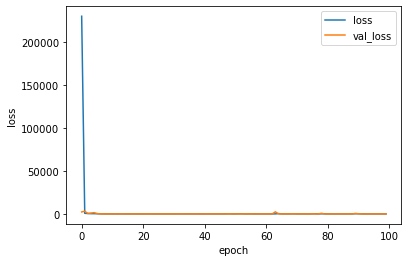

In [16]:
import matplotlib.pyplot as plt
#print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

## 5. 평가 예측

In [17]:
mse = model.evaluate([x1_test, x2_test], [y1_test, y2_test, y3_test], batch_size=1)
print("mse : ", mse )

10/10 [==============================] - 0s 3ms/sample - loss: 6.4008 - dense_11_loss: 1.3801 - dense_14_loss: 0.4249 - dense_17_loss: 4.5958 - dense_11_mse: 1.3801 - dense_14_mse: 0.4249 - dense_17_mse: 4.5958
mse :  [6.4007875442504885, 1.3800805, 0.42485866, 4.5958486, 1.3800805, 0.42485866, 4.5958486]


* y1_test : 91에서 100, 191에서 200
* y2_test : 591에서 600, 691에서 700
* y3_test : 790에서 800, 890에서 900

In [18]:
y1_predict, y2_predict, y3_predict = model.predict([x1_test, x2_test])
print("y1 예측값 : \n", y1_predict, "\n y2 예측값 : \n", y2_predict, "\n y3 예측값 : \n", y3_predict)

y1 예측값 : 
 [[ 90.26873 190.21713]
 [ 91.17966 191.13255]
 [ 92.09063 192.04803]
 [ 93.00153 192.96333]
 [ 93.91245 193.87877]
 [ 94.82329 194.79411]
 [ 95.73423 195.70949]
 [ 96.64515 196.62488]
 [ 97.55602 197.54033]
 [ 98.46696 198.45572]] 
 y2 예측값 : 
 [[591.2135  691.50714]
 [592.24646 692.5766 ]
 [593.2792  693.6459 ]
 [594.3119  694.71515]
 [595.34467 695.7844 ]
 [596.3774  696.85376]
 [597.41003 697.923  ]
 [598.4429  698.9924 ]
 [599.4757  700.06165]
 [600.5083  701.1309 ]] 
 y3 예측값 : 
 [[791.9705  892.63965]
 [793.0878  893.8419 ]
 [794.205   895.044  ]
 [795.3222  896.24603]
 [796.4394  897.448  ]
 [797.5565  898.6501 ]
 [798.67365 899.8522 ]
 [799.79095 901.0542 ]
 [800.9082  902.2565 ]
 [802.02515 903.4582 ]]
